In [7]:
mydict = {'fun':'python'}

print('My favorite thing is learning ' + mydict['fun'])

My favorite thing is learning python


# Lab 2: Iteration, data parsing, and the like

Hi all and welcome to Lab 2.

In this lab, we're not yet focusing on spatial data, but really diving into some of the core concepts with coding and automation - namely the ability to parse and manipulate data through iteration and flow control.

As always, spend some time reading through the lab and thinking about how to break apart each 'chunk' of the problem into something small. Some of these problems will have immediate applied uses, while others will simply be asking you to think computationally – about what you can and cannot solve using Python and how it might be used in a variety of generalized tasks. You will also gain familiarity with the specific syntax of the Python language.

There are a wide variety of articles, guides, tutorials, and reference materials available on the Python language. You’re encouraged to read through many of these and refer to them when you run into difficulty. Make sure you understand why any solution works or you will run into significant difficulties later.

As always, you'll turn your lab in [here](https://github.com/UWTMGIS/GIS501_W19/tree/master/lab2). File format remains `[lastname]_lab2.ipynb`

### Ready, then let's goooooo.


## Problem 1: Is GIS really *the best*?

### Part 1
In the files repository, you'll find a file called `GIS_is_the_best.txt`. You're going to open that file and count the **total** number of words in it.

There are a few approaches to this. You can load the file directly from the web (which we'll cover in a later lab, but if you feel like diving in, check out this [stack overflow discussion](https://stackoverflow.com/questions/1393324/in-python-given-a-url-to-a-text-file-what-is-the-simplest-way-to-read-the-cont) or [this module](http://docs.python-requests.org/en/master/). I find the latter easier to work with, but your mileage may vary). **Alternatively**, simply move the file to a local directory and open it like so:

```python
with open('file location', 'r') as file:
    #do some stuff
```

Then, you need to count the total number of words used.
A few hints for this:
1. Here's a nice [tutorial](https://www.pythonforbeginners.com/files/reading-and-writing-files-in-python) on dealing with text files.
2. Remember list comprehension: how are you going to count words?
3. the .upper(), .lower(), and .split() methods all might be useful.

#### In summary, your next cell should load up the text file and print out the total number of words in it (it should be 28,177).


In [4]:
z = 0

#First, I need to open the file
file = open('GIS_is_the_best.txt', 'r')

#Now I need to read it...
text = file.read()
for i in text.split():
    z +=1
print(z)


28177


### Part 2

Now it's time to find out what the most common word in that file is. This is a fairly fundamental task of parsing data, so it's good practice (also, I'll ask you to do it again in a slightly more complicated way below). 

Open the file again and, *this time*, return the most common words **and** how many times it has been used.

There's one additional thing to note: capitalization doesn't matter. So, GIS, gis, and Gis should all be counted the same. Similarly, Geospatial and geospatial would be the same. Here, the .upper() or .lower() method can help you.

#### In summary, your next cell should output the most common word in the text file and how many times it appears.

In [4]:
# open file
file = open('GIS_is_the_best.txt', 'r')
wordcount={}
    # lower case, & split into list
for word in file.read().lower().split():
    if word not in wordcount:
        # add  word to wordCounter dictionary
        wordcount[word] = 1
    else:
        # update count if word in dictionary
        wordcount[word] += 1
x = 0
for word in wordcount:
    if wordcount[word] >x:
        y = word
        x = wordcount[word]
    elif wordcount[word] ==x:
        p = word
        q = wordcount [word]
# print words and count
'''for key in wordcount.keys():
  print ("%s %s " %(key , wordcount[key]))'''
if x > q:
    print(y,x)
if x == q:
    print(y,x)
    print(p,q)
file.close();

geographic 7545
information 7545


## Problem 2: A love of Lovecraft

Ok, first, let's get it out of the way: H.P. Lovecraft was a disgusting racist. We're using this text because it's in the public domain and uses a lot of unique words, but let's not take our eyes off the prize; this is not an endorsement of the author.

With that out of the way, you'll find a .txt copy of *The Shunned House* in the same files repository where you found this lab, [here](https://github.com/UWTMGIS/GIS501_w19_files). Just like before, you can pull the files down locally or (try to) access them through the web (which will be covered in detail in a later lab).

### Part 1

Here, I want you to count the **number of unique words** in the text. 
A few directions:
1. Case **does not** matter - so 'Whisker' should be the same as 'whisker.'
2. Make sure you strip out punctuation - otherwise 'whisker?' and 'whisker!' will come back as different words.
3. Plurals are different words in this exercise - 'whiskers' and 'whisker' count separately.

A few hints:
1. Check out the [collections](https://docs.python.org/2/library/collections.html#collections) module.
2. One way to do this would be to create a dictionary of each word and then check the dictionaries length.
3. You should get around 3,000 words depending on what assumptions you bake into this. There's no austere 'right' answer as the directions are a bit opaque intentionally (design decisions matter!).

#### In summary, your next cell should output how many unique words Lovecraft uses in the copy of the Shunned House I have provided. 

In [14]:
# dictionary
wordcount = {}
# open file
with open('shunned_house.txt', 'r') as file:
    text = file.read()
# remove punc
for char in '.,?!":;-_%&*$':
    text = text.replace(char,' ')
# lower, split, & count
for word in text.lower().split():
    if word in wordcount:
        wordcount[word] += 1
    else:
        wordcount[word] = 1

print(len(wordcount))

2994


### Part 2

Excluding prepositions ('from,' 'the,' 'an', 'with', 'a', etc.) what are the five most frequently used words in *The Shunned House* and how many times does each appear?

#### In summary, your next cell should output the five most common non-prepositions in the text provided.

In [19]:
# dictionary
wordcount = {}
prepositions = ['from','the','an','with','a','that','in','to']
# open file
with open('shunned_house.txt', 'r') as file:
    text = file.read()
# remove punc
    for char in '.,?!":;-_%&*$':
        text = text.replace(char,' ')
# lower, split, & count
    for word in text.lower().split():
        if len(word) > 3 and word in wordcount:
            wordcount[word] += 1
        elif word not in prepositions:
            wordcount[word] = 1

house = list()
for key, val in wordcount.items():
    house.append((val, key) )

house.sort(reverse=True)
# print top 5
for key, val in house[:5] :
    print(key, val)

95 which
58 house
42 street
31 harris
30 there


### Part 3

Ok, last Lovecraft; I promise.

Last time, we counted the words he loved to use and how he used them. But, Lovecraft is also known for his lugubrious sentences, the long-winding means by which he tells us his terrible tales. I’m interested in how many characters his average sentence is. I’d also like a printed copy of the longest sentence and the shortest sentence in The Shunned House.

Think about how you opened the file, read it, and parsed it into a list last time… *What means do you have to count the character length of objects? What format do those objects have to be?* Etc.

This question will help you think about ways to parse through and iterate over different types of data sets (in this case a text file).

Hint: In the past, some students have used [nltk](https://pythonspot.com/category/nltk/) to solve this problem; **it is not necessary**.

In [1]:
import nltk
nltk.download('punkt')

text = ''.join(open('shunned_house.txt', 'r').read())

sentences = nltk.sent_tokenize(text)

print('longest sentence: ')
print(max(sentences, key = len))
print()
print('shortest sentence: ')
print(min(sentences, key = len))

longest sentence: 
A weak, 
filtered glow from the rain-harassed street-lamps outside, and a feeble 
phosphorescence from the detestable fungi within, showed the dripping 
stone of the walls, from which all traces of whitewash had vanished; 
the dank, fetid and mildew-tainted hard earth floor with its obscene 
fungi; the rotting remains of what had been stools, chairs, and tables, 
and other more shapeless furniture; the heavy planks and massive beams 
of the ground floor overhead; the decrepit plank door leading to bins 
and chambers beneath other parts of the house; the crumbling stone 
staircase with ruined wooden hand-rail; and the crude and cavernous 
fireplace of blackened brick where rusted iron fragments revealed the 
past presence of hooks, andirons, spit, crane, and a door to the Dutch 
oven--these things, and our austere cot and camp chairs, and the heavy 
and intricate destructive machinery we had brought.

shortest sentence: 
The horror has gone.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ryanj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Problem 3: Square roots

Write a script that takes a number and finds its square root within .001 accuracy. **Do not use any built in commands to find the square root, write the algorithm yourself (in other words, do not use `sqrt()` or `x**(1/2)` or the like)**

Pay attention to how many iterations your solution takes. Try to minimize it. There is a 'best' solution here, but try not to look it up; this is a chance to think through how you split apart and search through data sets (in this case numbers).

Hint: This isn't dissimilar to how you would guess a random number. Think about what the 'high' and 'low' values might be and how you can adjust each iteratively.

#### In summary, your next cell asks the user for a number and then returns that numbers square root within .001 accuracy. 

In [19]:
def squareroot(number, epsilon):
#condition check
    if number == '1':
        return 1
    elif number <= 0:
        print('Positive Numbers Only' )
    else:
        pass
    
    prev_estimate = number/2

    while True:
        #each itearation, calculate a new estimate
        new_estimate = (prev_estimate + number/prev_estimate)/2
        
        #check the difference between  square of new_estimate and number
        if abs(new_estimate * new_estimate - number) < epsilon:
            return prev_estimate

        #if not good enough, use it to make another estimate
        prev_estimate = new_estimate

#call the function, change 16 to a #    
print(squareroot(16,1e-5))

4.001219512195122


## Problem 4: Vowel Squares

This is a bit of a 'classic' problem. I'm going to give you a two-dimensional matrix of letters. You need to analyze said matrix to see if within it there exists a 2 by 2 grid of all vowels (hint: there is). If so, you print out the members of that grid; if not, you print out "No match found."

In other words, I'm going to give you something like this:

a b c d e f

g h i j k l

**a a** k e v o

**i o** e r p z

And, you'd need to return a a i o.

**THIS IS HARD**. Work together! Don't look up a solution, do think about how you might parse through this. There are many solutions, one I might consider is creating a new matrix that simple records if something is a vowel or not (i.e. a 1 value for a vowel, a 0 for not, etc.). *Partial credit is possible*.

In [11]:
# columns, nothing but columns
'''import pandas as pd
letters = [['a', 'j', 'k', 'e', 'i'], ['b', 'o', 'e', 'n', 'a'], ['u', 'i', 'a', 'z', 'i'] ]
A = ['a', 'j', 'k', 'e', 'i']
B = ['b', 'o', 'e', 'n', 'a']
C = ['u', 'i', 'a', 'z', 'i']

l = {'A': A, 'B': B, 'C':C}
l
{'A': ['a', 'j', 'k', 'e', 'i'], 'B': ['b', 'o', 'e', 'n', 'a'], 'C': ['u', 'i', 'a', 'z', 'i']}

df = pd.DataFrame(l,columns=['A','B','C'])
print(df)'''

# NO!
'''letters = [['a', 'j', 'k', 'e', 'i'], ['b', 'o', 'e', 'n', 'a'], ['u', 'i', 'a', 'z', 'i'] ]
flattened = []
for row in letters:
    for i in row:
        flattened.append(i)
print(flattened)'''

# close, returns the top-left position (row-column) of the square
'''letters = [['a', 'j', 'k', 'e', 'i'], ['b', 'o', 'e', 'n', 'a'], ['u', 'i', 'a', 'z', 'i'] ]

f = \
lambda m:([(y,x)for y in range(len(m)-1)for x in range(len(m[y])-1)if{*(m[y][x:x+2]+m[y+1][x:x+2])}<{*'aeiou'}]+['not found'])[0]

print(f(['ajkei', 'boena', 'uiazi']))'''

# try again, line 38&39: no go
'''def f(m):
    for y in range(len(m)-1):
        for x in range(len(m[y])-1):
            block = {m[y][x],m[y][x+1],m[y+1][x],m[y+1][x+1]}
            if (block < {*'aeiou'}):
                return (y,x)
            return 'Not Found'
print(f(['ajkei', 'boena', 'uiazi']))'''

# Jim's way *hint
letters = [['a', 'j', 'k', 'e', 'i'], ['b', 'o', 'e', 'n', 'a'], ['u', 'i', 'a', 'z', 'i'] ]
vowels = ['a', 'e', 'i', 'o', 'u']
x = 0
y = 0

while y <len(letters)-1:
    while x <len(letters[y])-1:
        if (letters[y][x] in vowels
            and letters[y][x+1] in vowels
            and letters[y+1][x] in vowels
            and letters[y+1][x+1] in vowels):
            #output goes here
            # print('YES') added for help
            print(letters[y][x], letters [y][x+1])
            print(letters[y+1][x], letters [y+1][x+1])
        x = x +1
    y = y +1
    x= 0

o e
i a


# Housekeeping

Next week, we're going to spend more time with functions **and** in) and [GeoPandas](https://developers.arcgis.com/python/) and [GeoPandas](http://geopandas.org/). There are others, of course, but these are two of the major players in the area and we'll be working with them a bit.

You're going to want to make sure that you know how to install both module within a virtual environment. Within a given environment at the Anaconda command prompt, type in:

`conda install geopandas`

**Boom** that should work. If you want to test if it works, load up a jupyter notebook in that environment (let's pretend it's this lab's environment) and try to run the following code:

C:\Users\ryanj\AppData\Local\conda\conda\envs\lab2\lib\site-packages\pysal\__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)
C:\Users\ryanj\AppData\Local\conda\conda\envs\lab2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


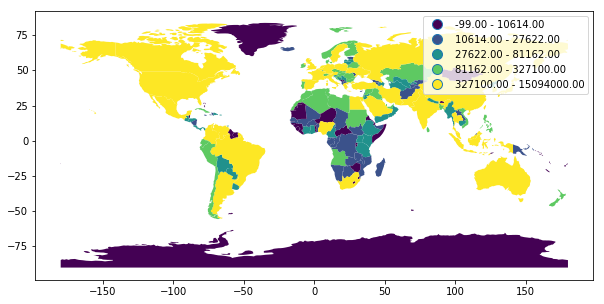

In [1]:
import geopandas

#This next line just tells the plotter to display within the notebook
%matplotlib inline

world = geopandas.read_file(
    geopandas.datasets.get_path('naturalearth_lowres')
)
    # NaturalEarth is a free dataset that comes with geopandas.
    #    See: http://www.naturalearthdata.com/ 
    # We could have just used a string with the filename of a shapefile there,
    #    instead of geopandas.datasets.get_path('naturalearth_lowres').

world.plot(column='gdp_md_est', scheme='quantiles', k=5, legend=True, figsize=(10,5))


**If that ran**, then you're good on geopandas. Of course, *note* I'm creating a quantile choropleth map using count data and that's... **not good**. But, this is just a demonstration.

Installing the ArcGIS API is *a little* more complicated, because ESRI. From a conda prompt in the virtual environment in which you want the module installed, type:

`conda install -c esri arcgis`

What that does is tells conda to look in the ESRI 'channel' (-c) to find the arcgis package.

Once you've got it installed and are in a jupyter notebook **with the package installed**, try the following code:

In [5]:
import arcgis

#ttown = arcgis.geocode('Tacoma')[0]

tGIS = arcgis.GIS()
tmap = tGIS.map()
#tmap.extent = ttown['extent']

tmap

MapView(layout=Layout(height='400px', width='100%'))

### If you're getting errors (no module named...) it means that either you haven't installed the module at all or you are running it from a virtual environment without it installed.

Try restarting your notebook within the environment in which the files are installed.

If you've answered all the questions and are able to run the above two boxes of code, you're done. Congratulations.